In [1]:
%load_ext autoreload
%autoreload 2

Auto Insurance Prediction of claims 
====================================

***Descartes Underwriting Technical Challenge***

**Author:** *Khaoula Belahsen*

In this notebook, I will go over the steps of my proposed solution for this technical challenge. This will include the following sections : 

    * Goal definition 
    * Getting the data 
    * Data cleaning and processing 
    * Insights and Vizualisation
    * Feature Engineering  
    * Meaningful prediction using Machine Learning 
    * Solution final proposal by giving the csv of prediction on the test dataset

# 1. Goal definition 

The aim of the project is to write structured code in python which provides a step-by-step solution for prediction of a feature TARGET_FLAG, based on a dataset for Car Insurance Claims. I will insist on describing the steps of this data science project, justifying the choices for metric and machine learning algorithm. The delivrables from this project will be a CSV file of predictions and the python code for the project. 

In [9]:
# All the necessary import for the project 

import numpy as np 
import pandas as pd 
import plotly.express as px 
import matplotlib.pyplot as plt 
pd.set_option('display.max_columns', None)
from processing import * 
from plot import * 
import seaborn as sns 
import numpy as np
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

# 2. Getting the data 

The data can be found in the zip file *auto-insurance-fall-2017.zip* . I was provided with 4 csv files : 

    * train_auto.csv and test_auto.csv : are respectively the training and test datasets for this project 
    * MEAN_AUTO.csv and SHELL_AUTO.csv are an example of prediction 

Let's look at the training dataset : 

In [3]:
train_path = r'C:\Users\Asus\Documents\Test Descartes Underwriting\auto-insurance-fall-2017\train_auto.csv'

train_auto = pd.read_csv(train_path)
train_auto.head(3)

,INDEX,TARGET_FLAG,TARGET_AMT,KIDSDRIV,AGE,HOMEKIDS,YOJ,INCOME,PARENT1,HOME_VAL,MSTATUS,SEX,EDUCATION,JOB,TRAVTIME,CAR_USE,BLUEBOOK,TIF,CAR_TYPE,RED_CAR,OLDCLAIM,CLM_FREQ,REVOKED,MVR_PTS,CAR_AGE,URBANICITY
0,1,0,0.0,0,60.0,0,11.0,"$67,349",No,$0,z_No,M,PhD,Professional,14,Private,"$14,230",11,Minivan,yes,"$4,461",2,No,3,18.0,Highly Urban/ Urban
1,2,0,0.0,0,43.0,0,11.0,"$91,449",No,"$257,252",z_No,M,z_High School,z_Blue Collar,22,Commercial,"$14,940",1,Minivan,yes,$0,0,No,0,1.0,Highly Urban/ Urban
2,4,0,0.0,0,35.0,1,10.0,"$16,039",No,"$124,191",Yes,z_F,z_High School,Clerical,5,Private,"$4,010",4,z_SUV,no,"$38,690",2,No,3,10.0,Highly Urban/ Urban


Let's also import the test set

In [4]:
test_path = r'C:\Users\Asus\Documents\Test Descartes Underwriting\auto-insurance-fall-2017\test_auto.csv'

test_auto = pd.read_csv(test_path)
test_auto.head(3)

,INDEX,TARGET_FLAG,TARGET_AMT,KIDSDRIV,AGE,HOMEKIDS,YOJ,INCOME,PARENT1,HOME_VAL,MSTATUS,SEX,EDUCATION,JOB,TRAVTIME,CAR_USE,BLUEBOOK,TIF,CAR_TYPE,RED_CAR,OLDCLAIM,CLM_FREQ,REVOKED,MVR_PTS,CAR_AGE,URBANICITY
0,3,NaN,NaN,0,48.0,0,11.0,"$52,881",No,$0,z_No,M,Bachelors,Manager,26,Private,"$21,970",1,Van,yes,$0,0,No,2,10.0,Highly Urban/ Urban
1,9,NaN,NaN,1,40.0,1,11.0,"$50,815",Yes,$0,z_No,M,z_High School,Manager,21,Private,"$18,930",6,Minivan,no,"$3,295",1,No,2,1.0,Highly Urban/ Urban
2,10,NaN,NaN,0,44.0,2,12.0,"$43,486",Yes,$0,z_No,z_F,z_High School,z_Blue Collar,30,Commercial,"$5,900",10,z_SUV,no,$0,0,No,0,10.0,z_Highly Rural/ Rural


In [5]:
train_auto.shape

(8161, 26)

The train dataset is composed of 8161 samples and 25 features.


In [6]:
train_auto.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8161 entries, 0 to 8160
Data columns (total 26 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   INDEX        8161 non-null   int64  
 1   TARGET_FLAG  8161 non-null   int64  
 2   TARGET_AMT   8161 non-null   float64
 3   KIDSDRIV     8161 non-null   int64  
 4   AGE          8155 non-null   float64
 5   HOMEKIDS     8161 non-null   int64  
 6   YOJ          7707 non-null   float64
 7   INCOME       7716 non-null   object 
 8   PARENT1      8161 non-null   object 
 9   HOME_VAL     7697 non-null   object 
 10  MSTATUS      8161 non-null   object 
 11  SEX          8161 non-null   object 
 12  EDUCATION    8161 non-null   object 
 13  JOB          7635 non-null   object 
 14  TRAVTIME     8161 non-null   int64  
 15  CAR_USE      8161 non-null   object 
 16  BLUEBOOK     8161 non-null   object 
 17  TIF          8161 non-null   int64  
 18  CAR_TYPE     8161 non-null   object 
 19  RED_CA

After doing some research, here is a summary of the different variables in the dataset, as well as my idea of their interest and impact for this study. 


| Variable || Definition || Type || Effect ||
| -:            | -:        |  -:  | -:    |
| INDEX || index of the rows  || -  || I will not use it for my study 
| TARGET_FLAG || 1 or 0 for if the insured made a claim || categorical || target to predict
| PARENT1 || single parents || categorical || describes insured client 
| CAR_USE || type of use ||categorical || most use == more risk ? 
| MSTATUS || marital status ||categorical || stability of insured client 
| RED_CAR || 1 is car is red else 0 || categorical || do red cars cost more ? 
| SEX || gender ||categorical ||gender statistics for accident probability ? 
| REVOKED || of driver's licence was revoked ||categorical ||risk of insured client 
| CAR_TYPE || car type || categorical || effects the claim amount 
| URBANICITY || urban or not || categorical || describes insured client 
| EDUCATION || level of education || categorical/ordinal || describes insured client 
| JOB || job type || categorical ||described insured client 
| INCOME || income in $ ||continuous ||describes insured client 
| HOME_VAL || home value|| continuous ||describes insured client
| TARGET_AMT  || cost of claim ||	continuous || - 
| TRAVTIME || travel time to work || continuous || longer drives == most risk ? 
| BLUEBOOK || value of the car ||continuous || effects the claim amount 
| OLDCLAIM ||amount of past claims ||continuous || effect of this amount on new claim amount 
| TIF || time in force || ordinal ||time that contract is active 
| KIDSDRIV || number of kids driving || ordinal || increased risk with teens driving 
| AGE || age of driver || ordinal ||young and old people increase risk 
| HOMEKIDS || number of kids at home ||ordinal ||describes insured client 
| YOJ || years on job || ordinal || gives idea of insured job stability 
| CLM_FREQ || number of past claims ||ordinal || effects likeliness of new claim
| MVR_PTS || number of points on license || ordinal || 
| CAR_AGE || age of the car || ordinal || effect on new claim 




Let's drop INDEX : 

In [15]:
# 3. Data Cleaning

## Refactoring the values of some variable : Processing 

For features INCOME, HOME_VAL, BLUEBOOK, OLDCLAIM, we are going to process the dollar amount to turn them into continuous values

money_processing(train_auto, ['INCOME', 'HOME_VAL','BLUEBOOK', 'OLDCLAIM'] )
train_auto.head(1)


In [7]:
train_auto['MSTATUS'] = train_auto['MSTATUS'].apply(lambda x : x.strip('z_<'))
train_auto['PARENT1'] = train_auto['PARENT1'].apply(lambda x : x.strip('z_<'))
train_auto['URBANICITY'] = train_auto['URBANICITY'].apply(lambda x : x.strip('z_<'))


,INDEX,TARGET_FLAG,TARGET_AMT,KIDSDRIV,AGE,HOMEKIDS,YOJ,INCOME,PARENT1,HOME_VAL,MSTATUS,SEX,EDUCATION,JOB,TRAVTIME,CAR_USE,BLUEBOOK,TIF,CAR_TYPE,RED_CAR,OLDCLAIM,CLM_FREQ,REVOKED,MVR_PTS,CAR_AGE,URBANICITY
0,1,0,0.0,0,60.0,0,11.0,67.349,No,0.0,z_No,M,PhD,Professional,14,Private,14.23,11,Minivan,yes,4.461,2,No,3,18.0,Highly Urban/ Urban


In [ ]:
## Handling missing values 

The following features have missing values that will need to be handled prior to a prediction : AGE,YOJ,INCOME,HOME_VAL,JOB, CAR_AGE.

plot_missing_values(train_auto, 'train')
plt.show()

In [8]:
As we can see, the data is pretty complete with 5 variables having about 5-6% missing values. As a first study, I am going to impute those missing values using the following scheme : 

    * JOB : impute with the most common category aka the mode 
    * INCOME, HOME_VAL : impute using the mean value 
    * AGE, YOJ, CAR_AGE : replace with the median value 
    
As an extension, I will later on evaluate using an iterative imputer to look at the whole  dataset in order to complete it. 

train_auto['JOB'].fillna(value=train_auto['JOB'].mode()[0], inplace=True)
replace_with_method(train_auto, ['INCOME', 'HOME_VAL'], 'mean')
replace_with_method(train_auto, ['AGE', 'CAR_AGE', 'YOJ'], 'median')

Let's check that the dataset is NA free now 

In [11]:
train_auto.isna().sum()

0

In [12]:
plot_missing_values(test_auto, 'test')

INDEX          0
TARGET_FLAG    0
TARGET_AMT     0
KIDSDRIV       0
AGE            0
HOMEKIDS       0
YOJ            0
INCOME         0
PARENT1        0
HOME_VAL       0
MSTATUS        0
SEX            0
EDUCATION      0
JOB            0
TRAVTIME       0
CAR_USE        0
BLUEBOOK       0
TIF            0
CAR_TYPE       0
RED_CAR        0
OLDCLAIM       0
CLM_FREQ       0
REVOKED        0
MVR_PTS        0
CAR_AGE        0
URBANICITY     0
dtype: int64

In [13]:
# 4. Insights and Visualization 

In this section, I'm going to perform a more in deep analysis of the data, through statistics and visualisation in order to better frame the problem that we are trying to solve. 

0

train_auto.head(3)

In [14]:
Let's first look at the distribution of our variables : 

,INDEX,TARGET_FLAG,TARGET_AMT,KIDSDRIV,AGE,HOMEKIDS,YOJ,INCOME,PARENT1,HOME_VAL,MSTATUS,SEX,EDUCATION,JOB,TRAVTIME,CAR_USE,BLUEBOOK,TIF,CAR_TYPE,RED_CAR,OLDCLAIM,CLM_FREQ,REVOKED,MVR_PTS,CAR_AGE,URBANICITY
0,1,0,0.0,0,60.0,0,11.0,67.349,No,0.000,z_No,M,PhD,Professional,14,Private,14.23,11,Minivan,yes,4.461,2,No,3,18.0,Highly Urban/ Urban
1,2,0,0.0,0,43.0,0,11.0,91.449,No,257.252,z_No,M,z_High School,z_Blue Collar,22,Commercial,14.94,1,Minivan,yes,0.000,0,No,0,1.0,Highly Urban/ Urban
2,4,0,0.0,0,35.0,1,10.0,16.039,No,124.191,Yes,z_F,z_High School,Clerical,5,Private,4.01,4,z_SUV,no,38.690,2,No,3,10.0,Highly Urban/ Urban


features_bin = ['TARGET_FLAG', 'PARENT1', 'MSTATUS', 'SEX', 'RED_CAR', 'REVOKED']
features_cat = ['EDUCATION', 'JOB', 'CAR_TYPE', 'URBANCITY','CAR_USE']
features_ord = ['KIDSDRIV', 'AGE', 'HOMEKIDS', 'YOJ', 'TRAVTIME', 'TIF', 'CLM_FREQ', 'CAR_AGE']
features_con = ['OLDCLAIM', 'BLUEBOOK', 'HOME_VAL', 'INCOME', 'TARGET_AMT']

In [16]:
plt.figure(figsize=(20, 20), dpi = 300)
plt.title('Distribution of binary features')

count = 0

for f in (features_bin):
    if  train_auto[f].nunique() <= 2:
        ax = plt.subplot(4, 4, count+1)
        sns.countplot(train_auto[f])
        plt.xlabel(f, fontsize = 14)
        plt.ylim(0, 10000)
        count += 1
plt.savefig('distribution.png')
plt.show()

In [ ]:
from pandas_profiling import ProfileReport

profile = ProfileReport(train_auto, title="Pandas Profiling Report")


Error: ModuleNotFoundError

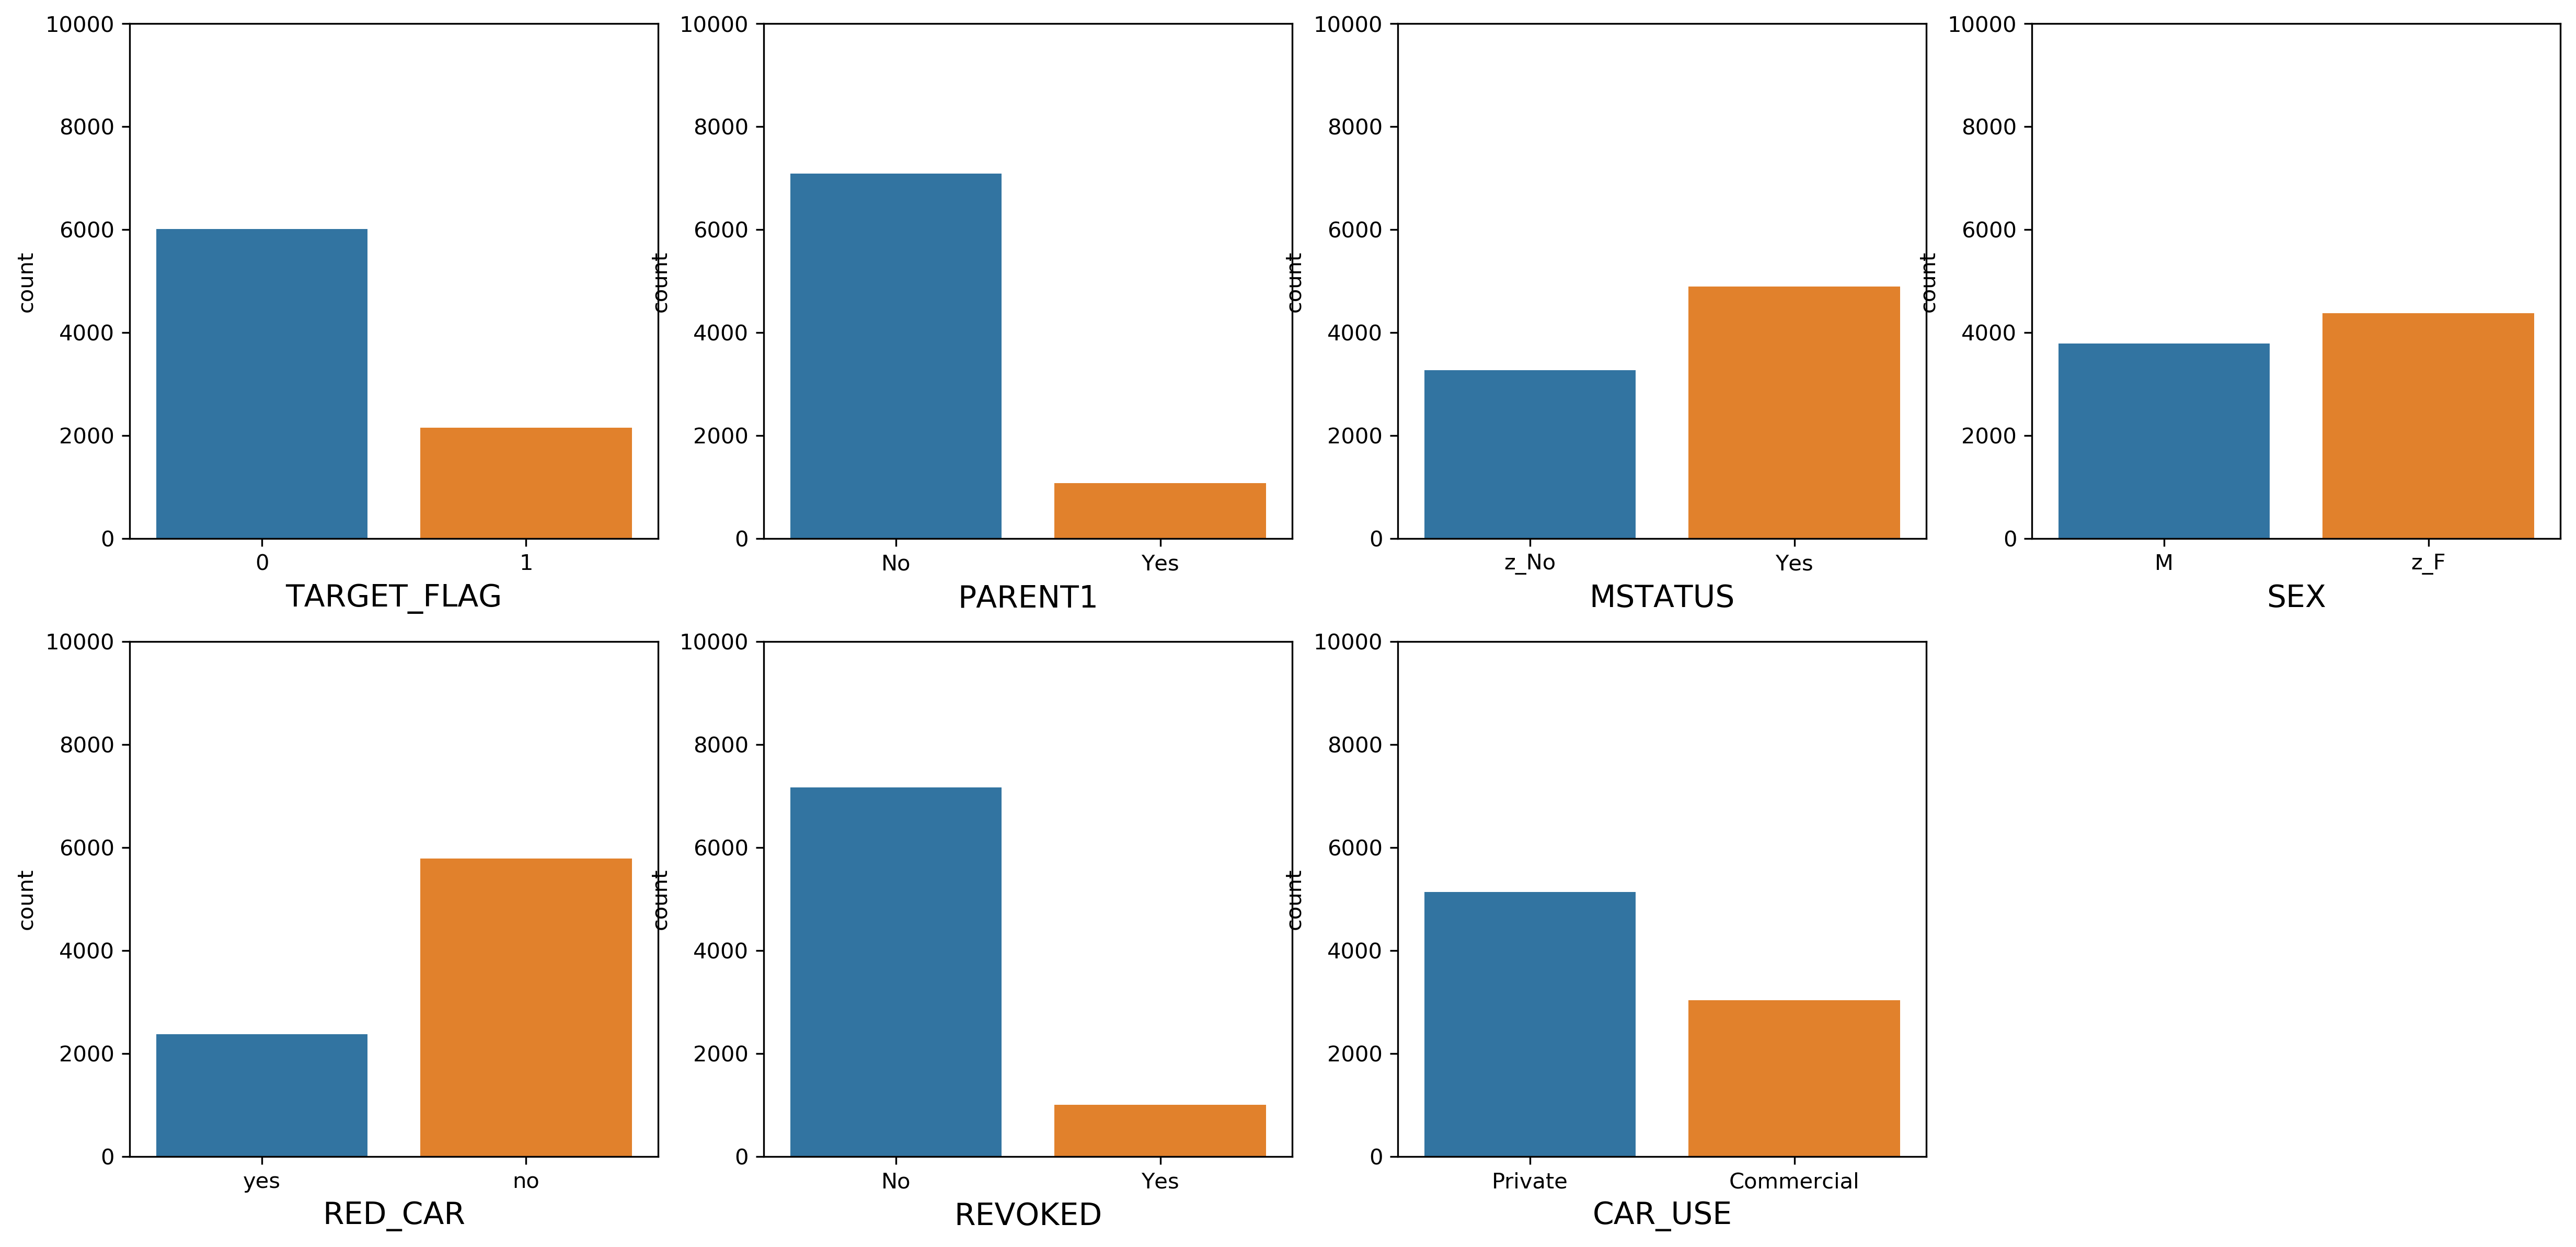

In [17]:
# 5. Features engineering 

For categorical features about CAR_TYPE, URBANICITY... let's create dummy features to better describe them. I previously checked for these variables that there are no different spellings of the same category.

train_auto = get_dummy(train_auto, ['URBANICITY', 'CAR_TYPE',, 'CAR_USE', 'JOB', 'EDUCATION'])

In [174]:
Let's also preprocess binary variables : MSTATUS, SEX, RED_CAR, REVOKED, PARENT1

binary_processing(train_auto)

In [175]:
train_auto.head(3)

0

In [176]:
Let's do the same thing for the test dataset : 

,INDEX,TARGET_FLAG,TARGET_AMT,KIDSDRIV,AGE,HOMEKIDS,YOJ,INCOME,PARENT1,HOME_VAL,MSTATUS,SEX,TRAVTIME,BLUEBOOK,TIF,RED_CAR,OLDCLAIM,CLM_FREQ,REVOKED,MVR_PTS,CAR_AGE,Highly Urban/ Urban,z_Highly Rural/ Rural,Minivan,Panel Truck,Pickup,Sports Car,Van,z_SUV,Commercial,Private,Clerical,Doctor,Home Maker,Lawyer,Manager,Professional,Student,z_Blue Collar,<High School,Bachelors,Masters,PhD,z_High School
0,1,0,0.0,0,60.0,0,11.0,67.349,0,0.000,0,1,14,14.23,11,1,4.461,2,0,3,18.0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0
1,2,0,0.0,0,43.0,0,11.0,91.449,0,257.252,0,1,22,14.94,1,1,0.000,0,0,0,1.0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1
2,4,0,0.0,0,35.0,1,10.0,16.039,0,124.191,1,0,5,4.01,4,0,38.690,2,0,3,10.0,1,0,0,0,0,0,0,1,0,1,1,0,0,0,0,0,0,0,0,0,0,0,1


test_auto = full_processing(test_auto)

In [177]:
test_auto.head(3)

In [178]:
## 4.2 Missing values imputation 

,INDEX,TARGET_FLAG,TARGET_AMT,KIDSDRIV,AGE,HOMEKIDS,YOJ,INCOME,PARENT1,HOME_VAL,MSTATUS,SEX,TRAVTIME,BLUEBOOK,TIF,RED_CAR,OLDCLAIM,CLM_FREQ,REVOKED,MVR_PTS,CAR_AGE,Highly Urban/ Urban,z_Highly Rural/ Rural,Minivan,Panel Truck,Pickup,Sports Car,Van,z_SUV,Commercial,Private,Clerical,Doctor,Home Maker,Lawyer,Manager,Professional,Student,z_Blue Collar,<High School,Bachelors,Masters,PhD,z_High School
0,3,NaN,NaN,0,48.0,0,11.0,52.881,0,0.0,0,1,26,21.97,1,1,0.000,0,0,2,10.0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0
1,9,NaN,NaN,1,40.0,1,11.0,50.815,1,0.0,0,1,21,18.93,6,0,3.295,1,0,2,1.0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1
2,10,NaN,NaN,0,44.0,2,12.0,43.486,1,0.0,0,0,30,5.90,10,0,0.000,0,0,0,10.0,0,1,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1


As stated before, the following variables contain missing values : 

    * AGE
    * YOJ
    * INCOME
    * HOME_VAL
    * CAR_AGE


corr = train_auto.corr()

plt.figure(figsize = (20,10), dpi= 400)
sns.heatmap(corr)
plt.title("Correlation Between Features", fontsize = 14)
plt.xticks(rotation = 'vertical')
plt.savefig('correlation.png')
plt.show()

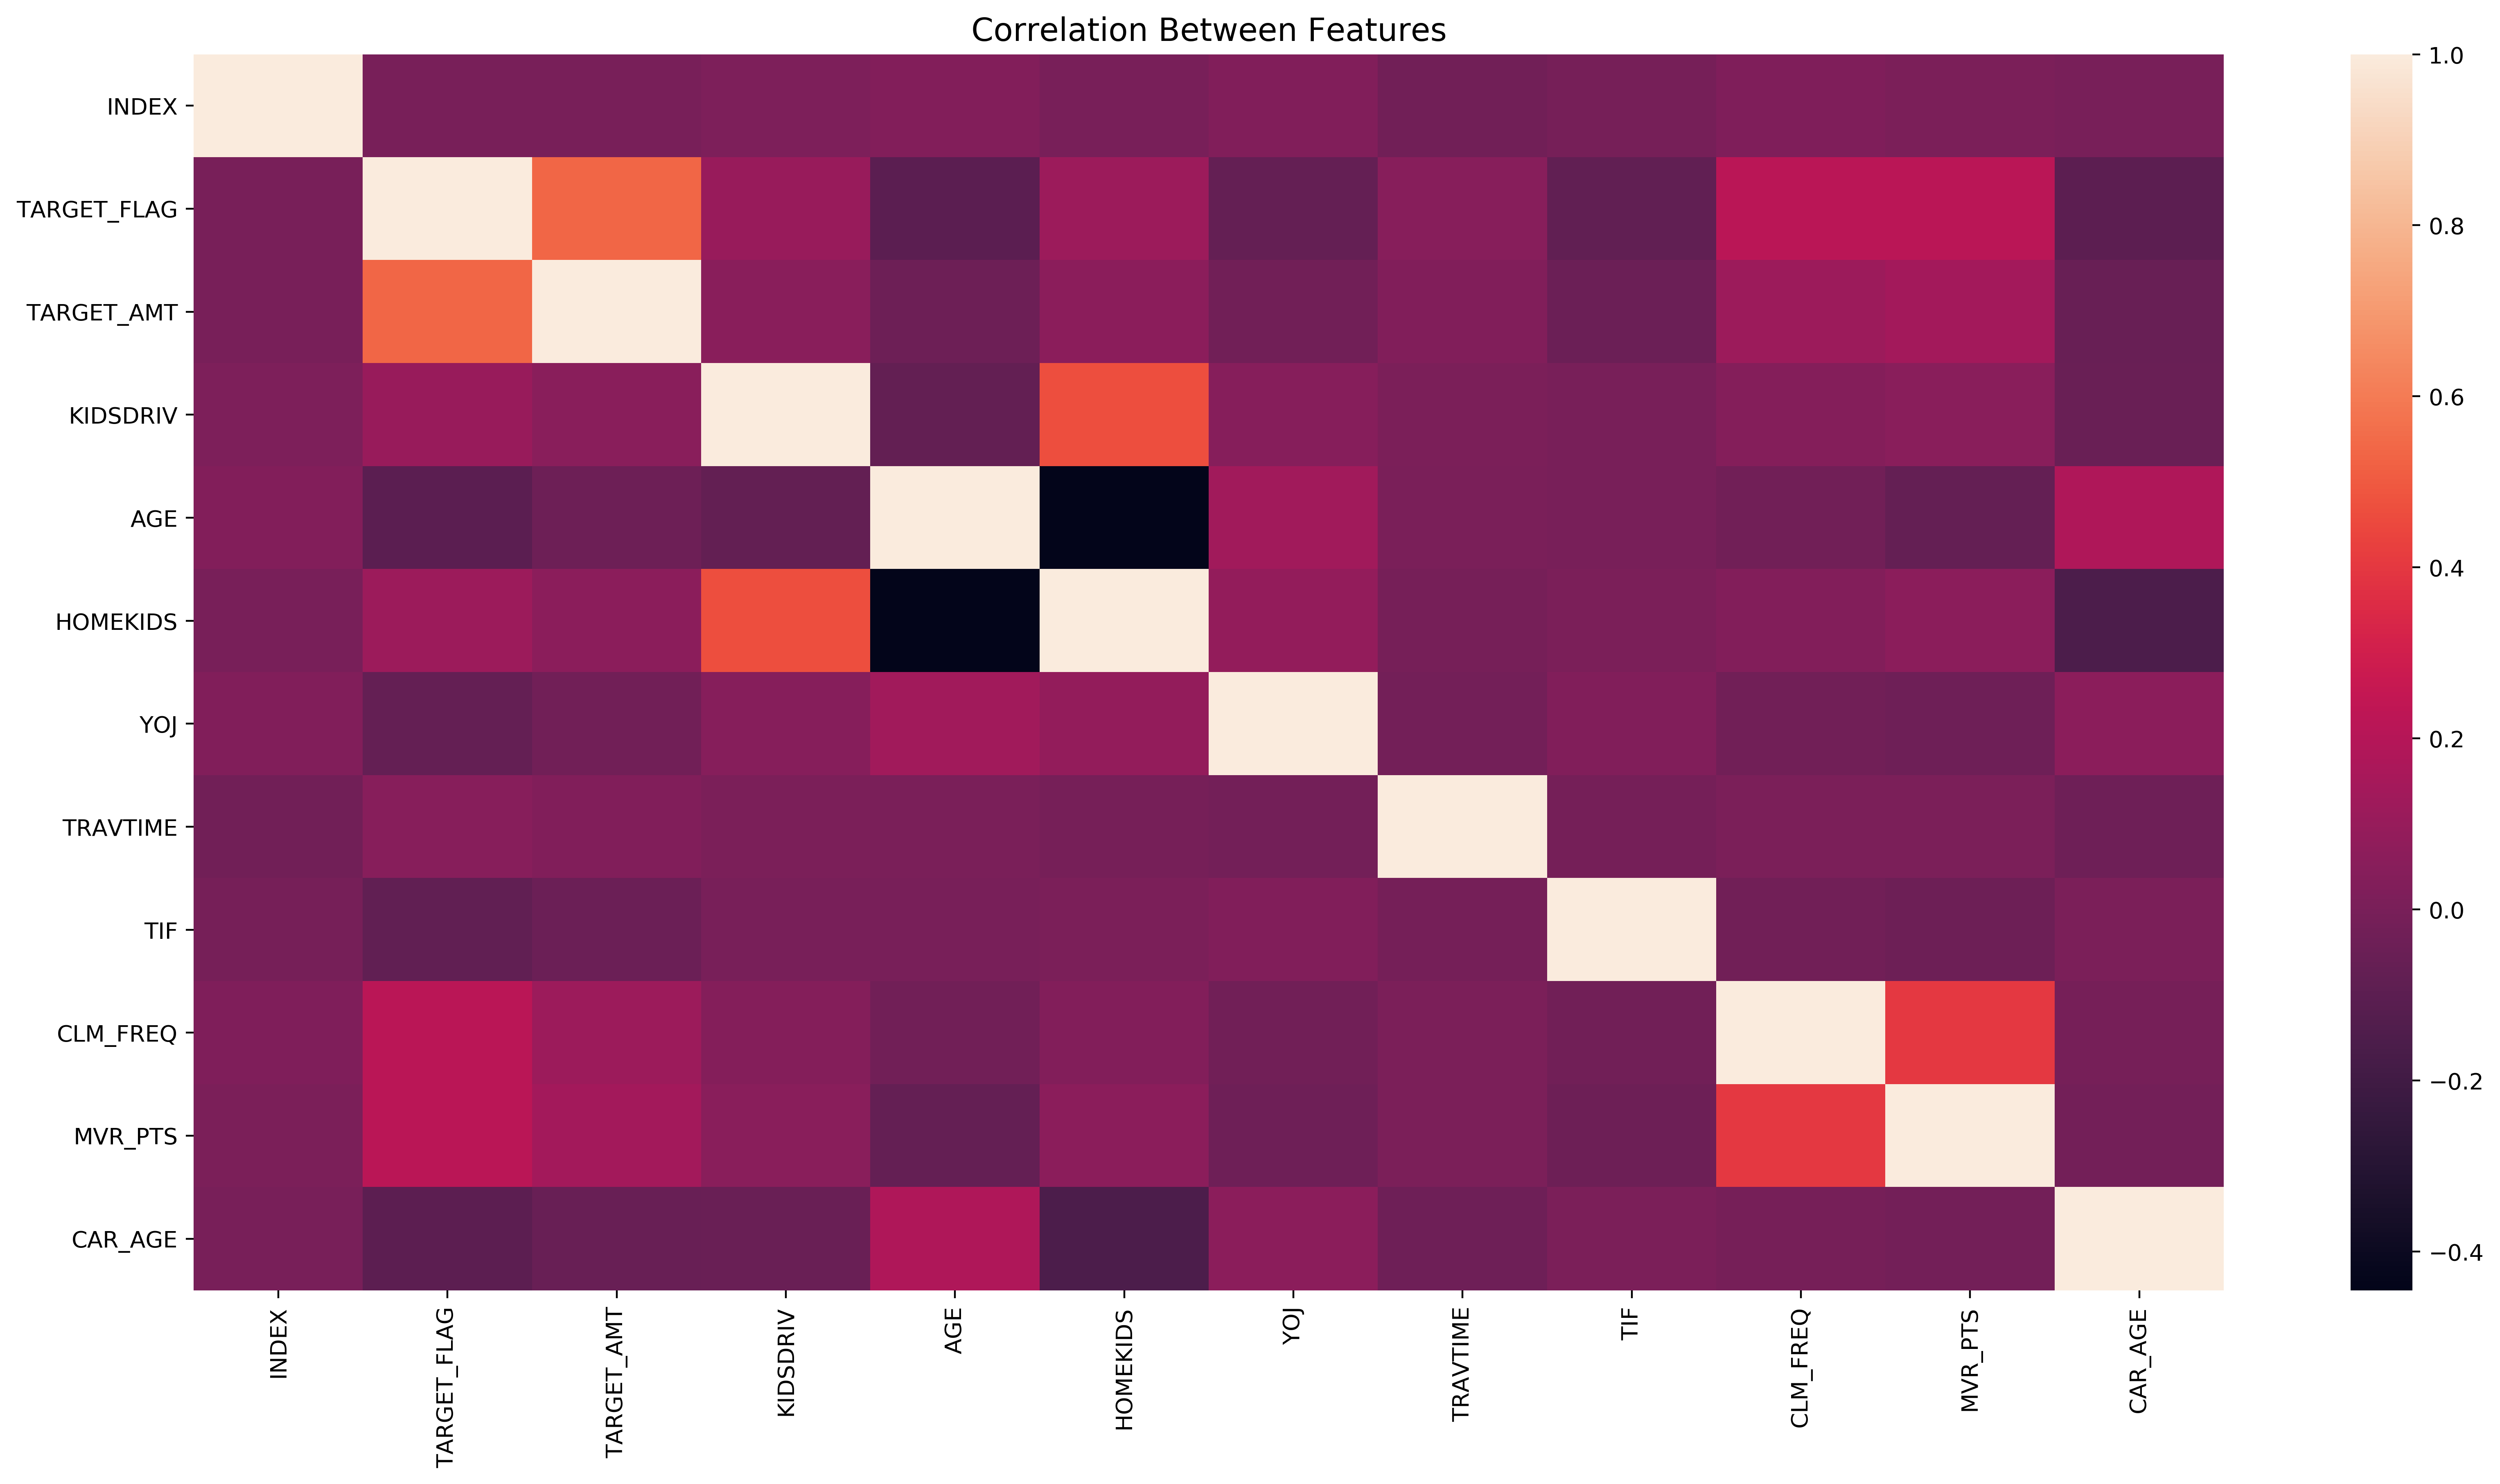

In [193]:
feature_bin = [f for f in train_.columns if f in ['']] 
feature_cat = [f for f in train.columns if f.endswith('cat')] 
feature_els = [f for f in train.columns if (f not in feature_bin) & (f not in feature_cat) & (f not in ['id', 'target'])]

In [ ]:
sns.pairplot(train_auto)